| Credentials |                                  |
|----|----------------------------------|
|Host | Montanuniversitaet Leoben        |
|Web | https://cps.unileoben.ac.at      |
|Mail | cps@unileoben.ac.at              |
|Author | Fotios Lygerakis                 |
|Corresponding Authors | fotios.lygerakis@unileoben.ac.at |
|Last edited | 28.09.2023                       |

This notebook contains code for visualizing the convolution operation.

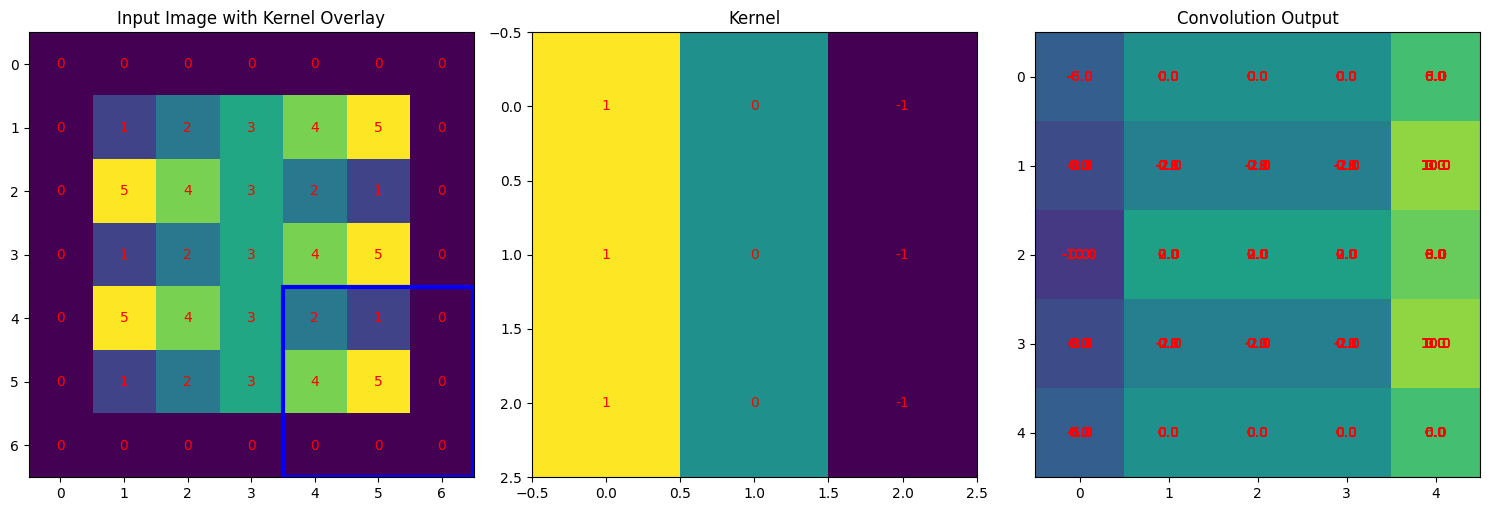

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter

# Sample image (5x5)
image = np.array([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5]
])

# Kernel (3x3)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
# # kernel (2x2)
# kernel = np.array([
#     [1, 0],
#     [1, 0]
# ])

# Stride and Padding
stride = 1
padding = 1

# Create padded image
padded_image = np.pad(image, ((padding, padding), (padding, padding)))

# Calculate output dimensions
output_dim = ((image.shape[0] - kernel.shape[0] + 2*padding) // stride) + 1

# Initialize the convolution output
conv_output = np.zeros((output_dim, output_dim))

# Calculate all possible top-left positions for the kernel
positions = [(y, x) for y in range(0, padded_image.shape[0] - kernel.shape[0] + 1, stride)
                   for x in range(0, padded_image.shape[1] - kernel.shape[1] + 1, stride)]

# Set up the plotting with three subplots for the image, kernel, and convolution output
fig, (ax1, ax_kernel, ax2) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(padded_image, cmap='viridis', aspect='equal')  # Use equal aspect for square pixels
ax_kernel.imshow(kernel, cmap='viridis', aspect='equal')  # Display the kernel
ax2.imshow(conv_output, cmap='viridis', aspect='equal', vmin=-15, vmax=15)  # Use equal aspect and set vmin, vmax for consistent color scaling

# Add subplot titles
ax1.set_title("Input Image with Kernel Overlay")
ax_kernel.set_title("Kernel")
ax2.set_title("Convolution Output")

# Display numbers on the matrix for the padded image
for i in range(padded_image.shape[0]):
    for j in range(padded_image.shape[1]):
        ax1.text(j, i, str(padded_image[i, j]), ha='center', va='center', color='red')

# Display numbers on the kernel
for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
        ax_kernel.text(j, i, str(kernel[i, j]), ha='center', va='center', color='red')

# Kernel rectangle overlay on ax1
rect = patches.Rectangle((-0.5, -0.5), kernel.shape[1], kernel.shape[0], 
                         linewidth=3, edgecolor='blue', facecolor='none')
ax1.add_patch(rect)

# Animation function
def animate(i):
    y, x = positions[i]
    rect.set_xy((x-0.5, y-0.5))

    # Compute the convolution for the current position
    region = padded_image[y:y+kernel.shape[0], x:x+kernel.shape[1]]
    conv_value = np.sum(region * kernel)
    
    # Correctly compute the position in the output matrix
    out_y = y // stride
    out_x = x // stride
    conv_output[out_y, out_x] = conv_value

    # Update the convolution output display
    ax2.imshow(conv_output, cmap='viridis', aspect='equal', vmin=-15, vmax=15)  # Adjusted colormap and vmin, vmax for better visualization

    # Display numbers on the matrix for the convolution output
    for i in range(conv_output.shape[0]):
        for j in range(conv_output.shape[1]):
            ax2.text(j, i, f"{conv_output[i, j]:.1f}", ha='center', va='center', color='red')

    return rect,


# Create animation with increased interval for slower movement
ani = FuncAnimation(fig, animate, frames=len(positions), interval=2000, blit=True, repeat_delay=10000)  # interval set to 5000 for slower movement

# Title and layout
# title_text = f"Kernel Size: {kernel.shape[0]}x{kernel.shape[1]}, Stride: {stride}, Padding: {padding}"
# fig.suptitle(title_text, fontsize=16)

# Adjust subplot spacing and layout
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Save and show
writer = PillowWriter(fps=2)
ani.save(f"convolution_animation_with_output_k{kernel.shape[0]}_s{stride}_p{padding}.gif", writer=writer)
plt.show()
